In [1]:
from sklearn.datasets import load_digits
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
mnist=load_digits()

In [3]:
x , y=mnist['data'] , mnist['target']

In [4]:
x.shape


(1797, 64)

In [5]:
y.shape

(1797,)

In [6]:
some_digits=x[809]
some_digits_image=some_digits.reshape(8  , 8)

(-0.5, 7.5, 7.5, -0.5)

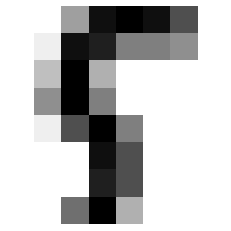

In [7]:
plt.imshow(some_digits_image , cmap=matplotlib.cm.binary , interpolation="nearest")
plt.axis('off')

In [8]:
y[809]

5

In [9]:
x_train , x_test = x[:1620] , x[1620:]

In [10]:
y_train , y_test = y[:1620] , y[1620:]

In [11]:
import numpy as np
shuffled_index=np.random.permutation(1620)
x_train , y_train=x_train[shuffled_index] , y_train[shuffled_index]


## Creating a 2 detector

In [12]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2= (y_train==2)
y_test_2= (y_test==2)

In [13]:
y_train_2 #  or y_test_2 it will be a array of true and false

array([False, False,  True, ..., False, False, False])

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
clf = LogisticRegression(tol =0.1 , solver ='lbfgs')

In [16]:
clf.fit(x_train , y_train_2)

LogisticRegression(tol=0.1)

In [17]:
clf.predict([some_digits])

array([False])

In [18]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf , x_train , y_train_2 , cv=3 , scoring="accuracy")

In [19]:
a.mean()

0.9987654320987654

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf , x_train , y_train_2 , cv=3 )

In [22]:
y_train_pred

array([False, False,  True, ..., False, False, False])

## Calculating Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_2 , y_train_pred)

array([[1457,    2],
       [   0,  161]], dtype=int64)

In [33]:
confusion_matrix(y_train_2 , y_train_2) # if our classifer , had predicted all values correctly then it would have been a prefect confusion matrix

array([[1459,    0],
       [   0,  161]], dtype=int64)

## Precision and Recall

In [27]:
from sklearn.metrics import precision_score , recall_score

In [28]:
(y_train_2 , y_train_pred) precision_score

0.9877300613496932

In [29]:
recall_score(y_train_2 , y_train_pred)

1.0

## F1_score

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_train_2 , y_train_pred)

0.9938271604938271

## Precision Recall Curve

In [34]:
from sklearn.metrics import precision_recall_curve

In [37]:
y_scores=cross_val_predict(clf , x_train , y_train_2 , cv=3 , method="decision_function")

In [39]:
y_scores


array([-10.49797107, -22.01809685,  11.08935216, ..., -41.09745132,
       -13.97238316, -28.0076484 ])

In [43]:
precision , recalls , threshold=precision_recall_curve(y_train_2 , y_scores)

In [44]:
precision

array([0.09938272, 0.0994441 , 0.09950556, ..., 1.        , 1.        ,
       1.        ])

In [45]:
recalls

array([1.        , 1.        , 1.        , ..., 0.01242236, 0.00621118,
       0.        ])

In [46]:
threshold

array([-50.39206321, -47.65154223, -45.69414569, ...,  19.49543862,
        21.8730027 ,  22.25415326])

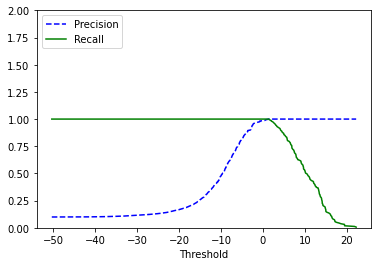

In [64]:
plt.plot(threshold , precision[:-1] , "b--" , label="Precision")
plt.plot(threshold , recalls[:-1] , "g-" , label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,2])
plt.show()